#WeatherPy

In [1]:
# Setup and Importing Dependencies
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import requests
import scipy.stats as st
from scipy.stats import linregress
import time

In [2]:
# Imports and defines API Key
from api_keys import weather_api_key
api_key = weather_api_key

##Generate Cities List

In [3]:
# Creating list to be filled with cities
from citipy import citipy
citylist = []

# Gathers random list of coordinates(Lat,Lng) and adds it to list
randomlatlist= np.random.uniform(-90,90,1600)
randomlonglist= np.random.uniform(-180,180,1600)
coordlist = [(randomlatlist[i], randomlonglist[i]) for i in range(0, len(randomlatlist))]

# Takes a look at the latitude and longitude and finds the nearest city
for coord in coordlist:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    
    #If this city is a unique city not yet in the citylist, this adds it to the city list
    if city not in citylist:
        citylist.append(city)

# Prints number of cities. This is to make sure I've collected at least 500 cities to create data from.
print(len(citylist))

654


###Perform API Calls
* Performs a weather check on each city using a series of successive API calls.
* Includes a print log of each city as it's being processed (with both the city number and city name).

In [4]:
# Creating list to filled with the cities' data
cities_data = []

# Creates base of url
base = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + api_key

# Begins both the record count and the set count at 1
rec_count = 1
set_count = 1

# Iterates through each city in the city list at a set limit and time delay
for i, city in enumerate(citylist):
    time.sleep(0.25)
    # After 50 cities, resets the record count to 0 and restarts the process.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        rec_count = 0
        
    # Prints City's Name along with its Record and Set Count
    print(f"Processing Record {rec_count} of set {set_count} | {city}")
    
    # Adds 1 to Record Count
    rec_count += 1
    url = f"{base}&q={city}"
    
    # Performs requests for API data to retrieve all variables needed
    try:
        weather_data = requests.get(url).json()
        city_tmp = weather_data['main']['temp']
        city_max_tmp = weather_data['main']['temp_max']
        city_humid = weather_data['main']['humidity']
        longitude = weather_data['coord']['lon']
        latitude = weather_data['coord']['lat']
        city_clouds = weather_data['clouds']['all']
        country = weather_data['sys']['country']
        city_wind_spd = weather_data['wind']['speed']
        date = weather_data['dt']
        
        # Add data requested into cities_data and convert to dictionary
        cities_data.append({"City" : city,
                           "Temperature" : city_max_tmp,
                           "Humidity" : city_humid,
                           "Longitude" : longitude,
                           "Latitude" : latitude,
                           "Cloudiness" : city_clouds,
                           "Country" :  country,
                           "Windspeed": city_wind_spd,
                           "Date": date
                           })
    # Adds exceptions when city is not found to keep the code running
    except:
        # Adds print statement for when exception is found
        print(f'City not found. Skipping...')
        pass

# Prints when its done running
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Processing Record 1 of set 1 | sataua
City not found. Skipping...
Processing Record 2 of set 1 | lugovoy
Processing Record 3 of set 1 | yulara
Processing Record 4 of set 1 | kapaa
Processing Record 5 of set 1 | villa carlos paz
Processing Record 6 of set 1 | klaksvik
Processing Record 7 of set 1 | sechura
Processing Record 8 of set 1 | gebze
Processing Record 9 of set 1 | busselton
Processing Record 10 of set 1 | port augusta
Processing Record 11 of set 1 | yarmouth
Processing Record 12 of set 1 | maningrida
Processing Record 13 of set 1 | katsuura
Processing Record 14 of set 1 | atuona
Processing Record 15 of set 1 | victoria
Processing Record 16 of set 1 | shamary
Processing Record 17 of set 1 | anadyr
Processing Record 18 of set 1 | taree
Processing Record 19 of set 1 | lagoa
Processing Record 20 of set 1 | baglan
Processing Record 21 of set 1 | pevek
Processing Record 22 of set 1 | wanaka
Processing Record 23 of set 1 | khabary
Processing Record 24 of set 1 | bluff
Processing Recor

Processing Record 39 of set 4 | saryshagan
City not found. Skipping...
Processing Record 40 of set 4 | college
Processing Record 41 of set 4 | mukhtolovo
Processing Record 42 of set 4 | ilulissat
Processing Record 43 of set 4 | mahenge
Processing Record 44 of set 4 | eureka
Processing Record 45 of set 4 | manuk mangkaw
Processing Record 46 of set 4 | vestmanna
Processing Record 47 of set 4 | bloemhof
Processing Record 48 of set 4 | barentsburg
City not found. Skipping...
Processing Record 49 of set 4 | attawapiskat
City not found. Skipping...
Processing Record 0 of set 5 | ahipara
Processing Record 1 of set 5 | obo
Processing Record 2 of set 5 | umzimvubu
City not found. Skipping...
Processing Record 3 of set 5 | iquique
Processing Record 4 of set 5 | faanui
Processing Record 5 of set 5 | cao bang
Processing Record 6 of set 5 | vanimo
Processing Record 7 of set 5 | mount pleasant
Processing Record 8 of set 5 | vostok
Processing Record 9 of set 5 | progreso
Processing Record 10 of set 5

Processing Record 23 of set 8 | dunmore town
Processing Record 24 of set 8 | grand baie
Processing Record 25 of set 8 | esperance
Processing Record 26 of set 8 | el dorado
Processing Record 27 of set 8 | warqla
City not found. Skipping...
Processing Record 28 of set 8 | fairbanks
Processing Record 29 of set 8 | beloha
Processing Record 30 of set 8 | tocopilla
Processing Record 31 of set 8 | ordynskoye
Processing Record 32 of set 8 | bosaso
Processing Record 33 of set 8 | qaqortoq
Processing Record 34 of set 8 | straumen
Processing Record 35 of set 8 | luba
Processing Record 36 of set 8 | tigzirt
Processing Record 37 of set 8 | bundaberg
Processing Record 38 of set 8 | ikwiriri
Processing Record 39 of set 8 | jumla
Processing Record 40 of set 8 | padang
Processing Record 41 of set 8 | goderich
Processing Record 42 of set 8 | paso del toro
Processing Record 43 of set 8 | lubango
Processing Record 44 of set 8 | canchungo
Processing Record 45 of set 8 | saint george
Processing Record 46 of

Processing Record 10 of set 12 | newton
Processing Record 11 of set 12 | bargal
City not found. Skipping...
Processing Record 12 of set 12 | vanino
Processing Record 13 of set 12 | skjervoy
Processing Record 14 of set 12 | talaya
Processing Record 15 of set 12 | basco
Processing Record 16 of set 12 | kailua
Processing Record 17 of set 12 | ostrovnoy
Processing Record 18 of set 12 | soyaux
Processing Record 19 of set 12 | los andes
Processing Record 20 of set 12 | mayo
Processing Record 21 of set 12 | gulariya
Processing Record 22 of set 12 | ouadda
Processing Record 23 of set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 24 of set 12 | rio grande
Processing Record 25 of set 12 | bethel
Processing Record 26 of set 12 | bad berleburg
Processing Record 27 of set 12 | bongandanga
Processing Record 28 of set 12 | sao joao da barra
Processing Record 29 of set 12 | west wendover
Processing Record 30 of set 12 | sao jose da coroa grande
Processing Record 31 of set 12 | muroto

###Convert Raw Data to DataFrame
* Exports the above city data into a .csv
* Displays the DataFrame

In [5]:
# Create Dataframe from API Data Collected
weatherpy_df = pd.DataFrame.from_dict(cities_data)

# Saves above data to CSV
weatherpy_csv = weatherpy_df.to_csv("Output_Data/City_Weather.csv",
                                   encoding="utf-8", index=True)

# Prints Head of DataFrame
weatherpy_df

,City,Temperature,Humidity,Longitude,Latitude,Cloudiness,Country,Windspeed,Date
0,lugovoy,44.40,55,72.76,42.95,29,KZ,5.61,1603667993
1,yulara,66.20,30,130.99,-25.24,28,AU,20.80,1603668257
2,kapaa,82.99,74,-159.32,22.08,40,US,9.17,1603668207
3,villa carlos paz,64.99,62,-64.50,-31.42,65,AR,15.26,1603668259
4,klaksvik,42.80,87,-6.59,62.23,26,FO,6.93,1603668260
...,...,...,...,...,...,...,...,...,...
587,manado,82.40,78,124.85,1.49,40,ID,1.74,1603668396
588,mushie,72.68,95,16.90,-3.02,98,CD,1.83,1603668521
589,belaya gora,9.99,93,146.42,68.53,10,RU,6.73,1603668522
590,togur,26.76,98,82.83,58.36,99,RU,10.18,1603668523


##Data Cleanup
* Inspects the data and removes any cities where the humidity > 100%
* Note, if there were no cities above that have humidity > 100%, this process is then skipped.

In [6]:
# Keeps only rows where the cities' humidity is 100% or less, eliminating any humidity > 100% rows
weatherpy_df = weatherpy_df[weatherpy_df["Humidity"] <= 100]

# Prints DataFrame to compare to above DataFrame in case any rows were dropped
weatherpy_df

,City,Temperature,Humidity,Longitude,Latitude,Cloudiness,Country,Windspeed,Date
0,lugovoy,44.40,55,72.76,42.95,29,KZ,5.61,1603667993
1,yulara,66.20,30,130.99,-25.24,28,AU,20.80,1603668257
2,kapaa,82.99,74,-159.32,22.08,40,US,9.17,1603668207
3,villa carlos paz,64.99,62,-64.50,-31.42,65,AR,15.26,1603668259
4,klaksvik,42.80,87,-6.59,62.23,26,FO,6.93,1603668260
...,...,...,...,...,...,...,...,...,...
587,manado,82.40,78,124.85,1.49,40,ID,1.74,1603668396
588,mushie,72.68,95,16.90,-3.02,98,CD,1.83,1603668521
589,belaya gora,9.99,93,146.42,68.53,10,RU,6.73,1603668522
590,togur,26.76,98,82.83,58.36,99,RU,10.18,1603668523


##Plotting the Data
Creates scatter plots that showcases the following relationships:
* Latitude vs. Temperature (F)
* Latitude vs. Humidity (%)
* Latitude vs. Cloudiness (%)
* Wind Speed (mph) vs. Latitude

###Latitude vs. Temperature Plot

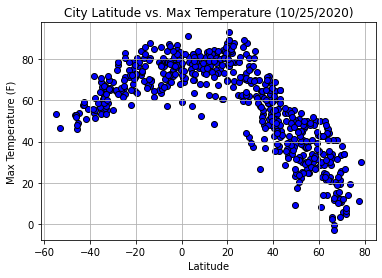

In [7]:
# Variables for Plot
city_latitude = weatherpy_df["Latitude"]
city_temperature = weatherpy_df["Temperature"]
date = datetime.date.today()
date = time.strftime("(%m/%d/%Y)")

# Plot Parameters
plt.scatter(city_latitude, city_temperature, marker="o", facecolor="blue", edgecolor="black")
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Saves Plot as a PNG
plt.savefig("Output_Data/Latitude_vs_Temperature_Plot.png")

# Showcases Plot
plt.show()

###Latitude vs. Humidity Plot

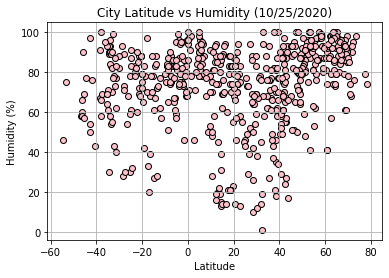

In [8]:
# Variables for Plot
city_humidity = weatherpy_df["Humidity"]

# Plot Parameters
plt.scatter(city_latitude, city_humidity, marker="o", facecolor="pink", edgecolor="black")
plt.title(f"City Latitude vs Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Saves Plot as a PNG
plt.savefig("Output_Data/Latitude_vs_Humidity_Plot.png")

# Showcases Plot
plt.show()

###Latitude vs. Cloudiness Plot

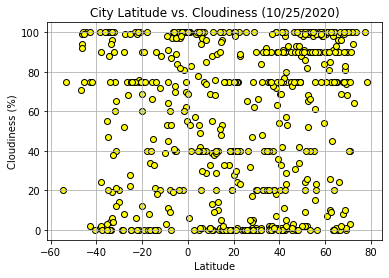

In [9]:
# Variables for Plot
city_cloudiness = weatherpy_df["Cloudiness"]

# Plot Parameters
plt.scatter(city_latitude, city_cloudiness, marker="o", facecolor="yellow", edgecolor="black")
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Saves Plot as a PNG
plt.savefig("Output_Data/Latitude_vs_Cloudiness_Plot.png")

# Showcases Plot
plt.show()

###Latitude vs. Wind Speed Plot

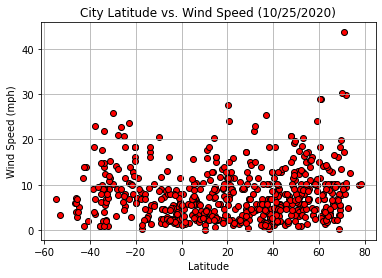

In [10]:
# Variables for Plot
city_wind_speed = weatherpy_df["Windspeed"]

# Plot Parameters
plt.scatter(city_latitude, city_wind_speed, marker="o", facecolor="red", edgecolor="black")
plt.title(f"City Latitude vs. Wind Speed {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Saves Plot as a PNG
plt.savefig("Output_Data/Latitude_vs_Wind_Speed_Plot.png")

# Showcases Plot
plt.show()

##Linear Regression

In [11]:
# Establishes which cities are in the Northern and Southern Hemisphere respectively
north_hemi_cities = weatherpy_df.loc[weatherpy_df["Latitude"]>=0]
south_hemi_cities = weatherpy_df.loc[weatherpy_df["Latitude"]<=0]

###North Hemisphere - Max Temp (F) vs. Latitude Linear Regression

The r-value is: -0.87


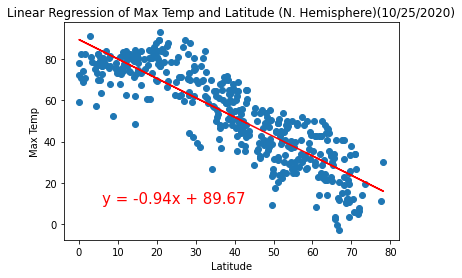

In [14]:
# Variables
n_latitude = north_hemi_cities["Latitude"]
n_temperature = north_hemi_cities["Temperature"]

# Calculates Linear Regression and Sets up Linear Regression Line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(n_latitude, n_temperature)
regress_values = n_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Parameters and Adds Linear Regression Line
plt.scatter(n_latitude, n_temperature)
plt.plot(n_latitude, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f"Linear Regression of Max Temp and Latitude (N. Hemisphere){date}")

# Saves Plot as a PNG
plt.savefig("Output_Data/Max_Temp_vs_Lat_Regression_N_Hemisphere.png")

# Calculates and Prints Pearson Coefficient of Plot
print(f"The r-value is: {round(st.pearsonr(n_temperature, n_latitude)[0],2)}")

* This graph has a strong negative correllation between the max temperature of the cities and their respective latitudes. This suggests that the further north of the equator one gets, the colder the city. It also would suggest as one gets closer to the equator, the warmer the city.

###South Hemisphere - Max Temp (F) vs. Latitude Linear Regression

The r-value is: 0.76


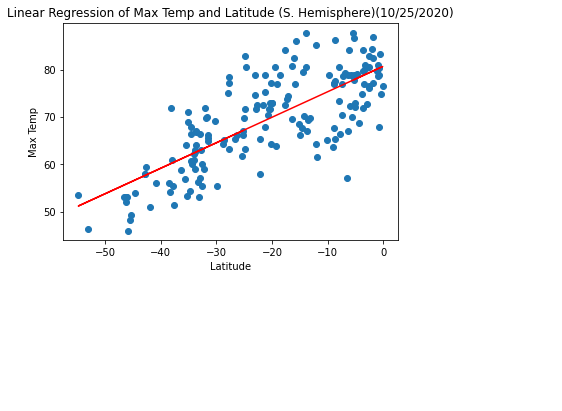

In [16]:
# Variables
s_latitude = south_hemi_cities["Latitude"]
s_temperature = south_hemi_cities["Temperature"]

# Calculates Linear Regression and Sets up Linear Regression Line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(s_latitude, s_temperature)
regress_values = s_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Parameters and Adds Linear Regression Line
plt.scatter(s_latitude, s_temperature)
plt.plot(s_latitude, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f"Linear Regression of Max Temp and Latitude (S. Hemisphere){date}")

# Saves Plot as a PNG
plt.savefig("Output_Data/Max_Temp_vs_Lat_Regression_S_Hemisphere.png")

# Calculates and Prints Pearson Coefficient of Plot
print(f"The r-value is: {round(st.pearsonr(s_temperature, s_latitude)[0],2)}")

* This graph has a strong positive correlation between the max temperature and the latitude for cities in the Southern Hemisphere. This would not only suggest that as you get closer to the equator, the city gets warmer, but also the further south you go, the colder the city. 

###North Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.27


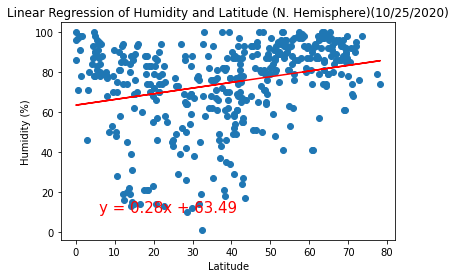

In [17]:
# Variables
n_humidity = north_hemi_cities["Humidity"]

# Calculates Linear Regression and Sets up Linear Regression Line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(n_latitude, n_humidity)
regress_values = n_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Parameters and Adds Linear Regression Line
plt.scatter(n_latitude, n_humidity)
plt.plot(n_latitude, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"Linear Regression of Humidity and Latitude (N. Hemisphere){date}")

# Saves Plot as a PNG
plt.savefig("Output_Data/Humidity_vs_Lat_Regression_N_Hemisphere.png")

# Calculates and Prints Pearson Coefficient of Plot
print(f"The r-value is: {round(st.pearsonr(n_humidity, n_latitude)[0],2)}")

* This graph has a very weak positive correlation between Humidity and Latitude, which would suggest that we cannot determinate that a relationship exists between humidity and latitude in Northern Hemisphere cities from this data.

###South Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.16


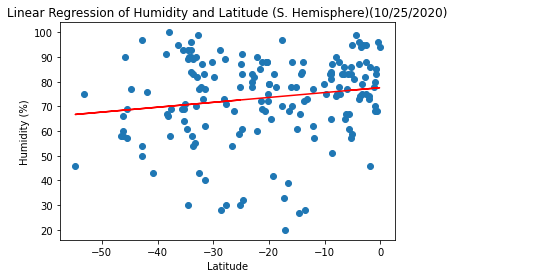

In [18]:
# Variables
s_humidity = south_hemi_cities["Humidity"]

# Calculates Linear Regression and Sets up Linear Regression Line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(s_latitude, s_humidity)
regress_values = s_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Parameters and Adds Linear Regression Line
plt.scatter(s_latitude, s_humidity)
plt.plot(s_latitude, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"Linear Regression of Humidity and Latitude (S. Hemisphere){date}")

# Saves Plot as a PNG
plt.savefig("Output_Data/Humidity_vs_Lat_Regression_S_Hemisphere.png")

# Calculates and Prints Pearson Coefficient of Plot
print(f"The r-value is: {round(st.pearsonr(s_humidity, s_latitude)[0],2)}")

* This graph has a very weak positive correlation between Humidity and Latitude, which would suggest that we cannot determinate that a relationship exists between humidity and latitude in Southern Hemisphere cities from this data.

###North Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.24


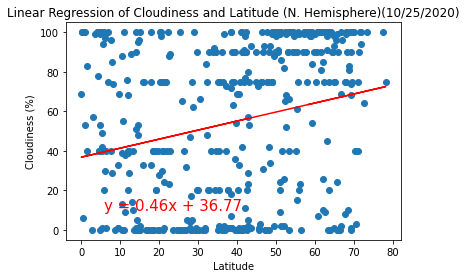

In [19]:
# Variables
n_cloudiness = north_hemi_cities["Cloudiness"]

# Calculates Linear Regression and Sets up Linear Regression Line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(n_latitude, n_cloudiness)
regress_values = n_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Parameters and Adds Linear Regression Line
plt.scatter(n_latitude, n_cloudiness)
plt.plot(n_latitude, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"Linear Regression of Cloudiness and Latitude (N. Hemisphere){date}")

# Saves Plot as a PNG
plt.savefig("Output_Data/Cloudiness_vs_Lat_Regression_N_Hemisphere.png")

# Calculates and Prints Pearson Coefficient of Plot
print(f"The r-value is: {round(st.pearsonr(n_cloudiness, n_latitude)[0],2)}")

* This graph has a very weak positive correlation between Cloudiness and Latitude, which would suggest that we cannot determinate that a relationship exists between cloudiness and latitude in Northern Hemisphere cities from this data.

###South Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.14


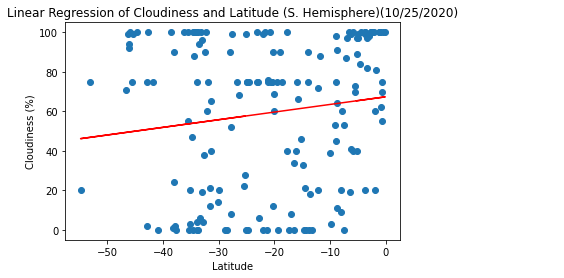

In [21]:
# Variables
s_cloudiness = south_hemi_cities["Cloudiness"]

# Calculates Linear Regression and Sets up Linear Regression Line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(s_latitude, s_cloudiness)
regress_values = s_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Parameters and Adds Linear Regression Line
plt.scatter(s_latitude, s_cloudiness)
plt.plot(s_latitude, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"Linear Regression of Cloudiness and Latitude (S. Hemisphere){date}")

# Saves Plot as a PNG
plt.savefig("Output_Data/Cloudiness_vs_Lat_Regression_S_Hemisphere.png")

# Calculates and Prints Pearson Coefficient of Plot
print(f"The r-value is: {round(st.pearsonr(s_cloudiness, s_latitude)[0],2)}")

* This graph has a very weak positive correlation between Cloudiness and Latitude, which would suggest that we cannot determinate that a relationship exists between cloudiness and latitude in Southern Hemisphere cities from this data.

###North Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.2


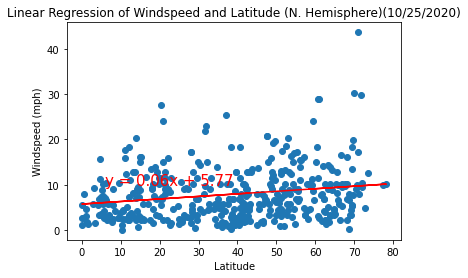

In [22]:
# Variables
n_wind_speed = north_hemi_cities["Windspeed"]

# Calculates Linear Regression and Sets up Linear Regression Line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(n_latitude, n_wind_speed)
regress_values = n_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Parameters and Adds Linear Regression Line
plt.scatter(n_latitude, n_wind_speed)
plt.plot(n_latitude, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.title(f"Linear Regression of Windspeed and Latitude (N. Hemisphere){date}")

# Saves Plot as a PNG
plt.savefig("Output_Data/Windspeed_vs_Lat_Regression_N_Hemisphere.png")

# Calculates and Prints Pearson Coefficient of Plot
print(f"The r-value is: {round(st.pearsonr(n_wind_speed, n_latitude)[0],2)}")

* This graph has a very weak positive correlation between Windspeed and Latitude, which would suggest that we cannot determinate that a relationship exists between windspeed and latitude in Northern Hemisphere cities from this data.

###South Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.21


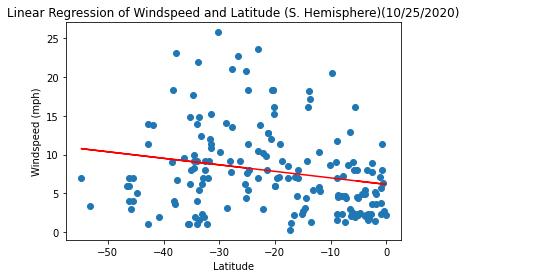

In [23]:
# Variables
s_wind_speed = south_hemi_cities["Windspeed"]

# Calculates Linear Regression and Sets up Linear Regression Line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(s_latitude, s_wind_speed)
regress_values = s_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Parameters and Adds Linear Regression Line
plt.scatter(s_latitude, s_wind_speed)
plt.plot(s_latitude, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.title(f"Linear Regression of Windspeed and Latitude (S. Hemisphere){date}")

# Saves Plot as a PNG
plt.savefig("Output_Data/Windspeed_vs_Lat_Regression_S_Hemisphere.png")

# Calculates and Prints Pearson Coefficient of Plot
print(f"The r-value is: {round(st.pearsonr(s_wind_speed, s_latitude)[0],2)}")

* This graph has a very weak negative correlation between Windspeed and Latitude, which would suggest that we cannot determinate that a relationship exists between windspeed and latitude in Southern Hemisphere cities from this data.